<a href="https://colab.research.google.com/github/ajohn256/Deep-Learning-With-Pytorch/blob/main/LINEAR_REGRESSION_WITH_PYTORCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [24]:
# 1) Prepare dataset
# 2) Design the model
# 3) Define Loss and Optimizer
# 4) Design tthe training loop

**PREPARING DATA**

In [25]:
X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

In [26]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [27]:
y.shape[0]

100

In [28]:
y = y.view(y.shape[0],1)

In [29]:
n_sample, n_features = X.shape
n_features

1

**CREATING MODEL**

In [30]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

**OPtimization**

In [38]:
lr = 1e-2
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
epochs = 100

Training **Model** **bold text**

In [39]:
for epoch in range(epochs):
  #forward pass and loss computation
  y_pred = model(X)
  loss = criterion(y_pred,y)

  #calculate gradients / back propagation
  loss.backward()

  #update the weights
  optimizer.step()

  #empty gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: loss = {loss.item():.4f}')


epoch 1: loss = 4130.3208
epoch 11: loss = 3086.5042
epoch 21: loss = 2331.3840
epoch 31: loss = 1784.5240
epoch 41: loss = 1388.0900
epoch 51: loss = 1100.4375
epoch 61: loss = 891.5381
epoch 71: loss = 739.7119
epoch 81: loss = 629.2859
epoch 91: loss = 548.9177


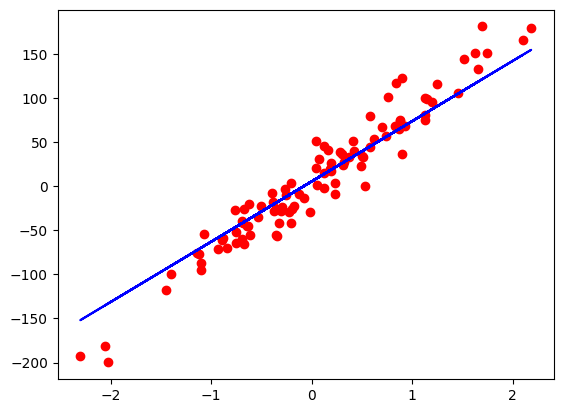

In [40]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()